# Sprint 8 - Ejercicios de Algoritmos de Agrupación


### Ejercicio 1

**Descarga el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilitzando el algoritmo de K-means.**

Lo primero que haremos será descargar el dataset, ver su composición, limpiarlo y analizarlo.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 


ruta_archivo = "C:\\Users\\gemma\\OneDrive\\Escritorio\\It Academy Tasks\\SP 8 T1\\Publicacions Facebook Thailandia.csv"


df_tailand = pd.read_csv(ruta_archivo)
df_tailand.head()


C:\Users\gemma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
df_tailand.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df_tailand.shape

(7050, 16)

In [4]:
df_tailand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

El origen de este dataset es desconocido, no sabemos exactamente su fuente, ni donde se ha publicado. Lo que si podemos decir es que según su título proviene de Facebook y los registros que contiene van desde el 15/07/12 al 13/06/18. El dataset original consta de 12 columnas:

1. **status_id**: Es un identificador único para cada publicación en Facebook. Cada publicación tiene un ID que la distingue de otras publicaciones en la base de datos. Consta de dos partes: ID del usuario y el ID de la publicación.

2. **status_type**: Indica el tipo de publicación que se realizó. Esto puede ser un enlace compartido, una foto, un video, un estado de texto, etc. Es una categoría.

3. **status_published**: Es la fecha y hora en la que se publicó. 

4. **num_reactions**: Representa el número total de reacciones (me gusta, corazones, sorpresas, risas, tristezas, enojos, etc.) que ha recibido la publicación. Las reacciones son una forma en que los usuarios interactúan con las publicaciones, expresando sus sentimientos o emociones.

5. **num_comments**: Indica el número de comentarios, respuestas escritas, que ha recibido la publicación.

6. **num_shares**: Muestra cuántas veces se ha compartido la publicación en la plataforma. 

7. **num_likes**: Representa el número de veces que la publicación ha recibido "Me gusta". Es una forma de interacción positiva con una publicación.

8. **num_loves**: Indica cuántas veces la publicación ha recibido la reacción "Me encanta" (corazones). Es una forma de interacción positiva con una publicación.

9. **num_wows**: Muestra cuántas veces la publicación ha recibido la reacción "Me asombra" (una cara asombrada). Esta reacción suele indicar que la publicación generó sorpresa o asombro.

10. **num_hahas**: Representa el número de veces que la publicación ha recibido la reacción "Me divierte" (una cara riendo). Esta reacción se utiliza cuando la publicación es divertida o cómica.

11. **num_sads**: Indica cuántas veces la publicación ha recibido la reacción "Me entristece" (una cara triste). Esta reacción refleja sentimientos de tristeza o compasión.

12. **num_angrys**: Muestra cuántas veces la publicación ha recibido la reacción "Me enoja" (una cara enojada). Es una forma de interacción negativa con una publicación.

Estas variables proporcionan información sobre cómo las publicaciones en Facebook son percibidas y respondidas por los usuarios. Esto es útil para el análisis de la interacción en la plataforma y para comprender mejor la respuesta del público a diferentes tipos de contenido.

In [5]:
df_tailand["status_type"].value_counts()


photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [6]:
df_tailand["status_id"].value_counts()

819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: status_id, Length: 6997, dtype: int64

In [7]:
num_id_unicos= len(df_tailand["status_id"].value_counts())
print("Número de status_id únicos:", num_id_unicos)

Número de status_id únicos: 6997


Vamos a trabajar con un dataset inicial de 7050 registros y 16 columnas. De estas 16 columnas, las cuatro últimas están vacías, de manera que procederemos a eliminarlas. También he observado que hay tres columnas categorizadas como objetos. La primera es el identificador que debería ser único. Esta columna está compuesta por dos variables: el id del usuario y el id de la publicación. La dividiremos en sus dos variables. De los 7050 registros 6997 son únicos. De manera que deberemos chequear los duplicados y eliminarlos. La segunda columna objeto es "status_type" esta se trata de una categoría que tiene 4 tipos diferentes de datos. Esta columna se debería pasar a categoría. Y la tercera es "status_published" esta columna hace referencia a la fecha de publicaión del post. Está compuesta por el mes/día/año/ y la hora. Creo que sería conveniente separala en dos columnas diferentes y asignarles el tipo fecha.

Ahora faltará ver si contiene valores NAN.

In [8]:
# Primero eliminamos las tres últimas columnas del dataset

df_tailand_1=df_tailand.drop(["Column1","Column2","Column3","Column4"],axis=1)
df_tailand_1.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [9]:
# Segundo chequearemos los duplicados

duplicados = df_tailand_1[df_tailand_1.duplicated(keep=False)]
duplicados_ordenados = duplicados.sort_values(by="status_id")

duplicados_ordenados


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6172,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0
6171,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6170,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6175,819700534875473_997075427137982,status,6/1/2018 0:35,111,2,1,110,1,0,0,0,0
6225,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0
6174,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0
6173,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0


In [10]:
# Confirmamos que todas las columnas de los id duplicados son iguales. Procedemos a eliminar los duplicados

df_tailand_2=df_tailand_1.drop_duplicates()
df_tailand_2.shape

(6999, 12)

In [11]:
df_tailand_2["status_type"]=df_tailand_2["status_type"].astype("category")

In [12]:
df_tailand_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   status_id         6999 non-null   object  
 1   status_type       6999 non-null   category
 2   status_published  6999 non-null   object  
 3   num_reactions     6999 non-null   int64   
 4   num_comments      6999 non-null   int64   
 5   num_shares        6999 non-null   int64   
 6   num_likes         6999 non-null   int64   
 7   num_loves         6999 non-null   int64   
 8   num_wows          6999 non-null   int64   
 9   num_hahas         6999 non-null   int64   
 10  num_sads          6999 non-null   int64   
 11  num_angrys        6999 non-null   int64   
dtypes: category(1), int64(9), object(2)
memory usage: 663.2+ KB


In [13]:
# Ahora separaremos la columna "status_id" en dos.
# La primera parte será el id de usuario y la segunda el id de la publicación

# Dividimos las columnas
df_tailand_2[["user_id", "pub_id"]] = df_tailand_2["status_id"].str.split('_', 1, expand=True)

# Convertimos la columna 'user_id' al tipo de datos 'category'
df_tailand_2["user_id"] = pd.Categorical(df_tailand_2["user_id"])

# Convertimos la columna 'pub_id' al tipo de datos 'object' (cadena)
df_tailand_2["pub_id"] = df_tailand_2["pub_id"].astype(str)

df_tailand_2


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,user_id,pub_id
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,1050855161656896,1061863470556065
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,1050855161656896,1061334757275603
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,1050855161656896,1060126464063099
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1050855161656896,1058663487542730


In [14]:
df_tailand_2["user_id"].value_counts()


246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
Name: user_id, dtype: int64

Tras observar los valores de la variable "user_id" determinamos que no se debe tratar del id de usuario. Ya que cuestra creer que durante 5 años sólo 9 usuarios hayan publicado en Facebook algo relacionado con Tailandia. De todas maneras esta variable ni la variable anterior "status_id" eran determinantes para el clustering. Pero si que lo eran para poder confirmar la existencia de valores duplicados. De manera que las eliminaremos del dataset las tres.

In [15]:
# Ahora eliminamos las columnas recientemente creadas "user_id" y "pub_id".

df_tailand_3=df_tailand_2.drop(["status_id","user_id","pub_id"], axis=1)
df_tailand_3

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [16]:
# El próximo paso será separar la columna "status_published" en dos. 
#La primera en fecha y darle la categoría de date y la segunda en hora y darle categoría de time.

# Dividimos las columnas
df_tailand_3[["stat_pub_date", "stat_pub_time"]] = df_tailand_3["status_published"].str.split(' ', 1, expand=True)

# Convertimos la columna al tipo de datos datetime
df_tailand_3["stat_pub_date"] = pd.to_datetime(df_tailand_3["stat_pub_date"], format='%m/%d/%Y')

# Convertimos la columna 'Hora' al tipo de datos time
df_tailand_3["stat_pub_time"] = pd.to_datetime(df_tailand_3["stat_pub_time"], format='%H:%M').dt.time

df_tailand_3

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_pub_date,stat_pub_time
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018-04-22,06:00:00
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018-04-21,22:45:00
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,2018-04-21,06:17:00
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,2018-04-21,02:29:00
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,2016-09-24,02:58:00
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,2016-09-23,11:19:00
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,2016-09-21,23:03:00
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,2016-09-20,00:43:00


In [17]:
# Ahora eliminamos la columna "status_published"

df_tailand_4=df_tailand_3.drop(["status_published"], axis=1)
df_tailand_4

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_pub_date,stat_pub_time
0,video,529,512,262,432,92,3,1,1,0,2018-04-22,06:00:00
1,photo,150,0,0,150,0,0,0,0,0,2018-04-21,22:45:00
2,video,227,236,57,204,21,1,1,0,0,2018-04-21,06:17:00
3,photo,111,0,0,111,0,0,0,0,0,2018-04-21,02:29:00
4,photo,213,0,0,204,9,0,0,0,0,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,2016-09-24,02:58:00
7046,photo,16,0,0,14,1,0,1,0,0,2016-09-23,11:19:00
7047,photo,2,0,0,1,1,0,0,0,0,2016-09-21,23:03:00
7048,photo,351,12,22,349,2,0,0,0,0,2016-09-20,00:43:00


In [18]:
df_tailand_sort = df_tailand_4.sort_values("stat_pub_date")
df_tailand_sort

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_pub_date,stat_pub_time
2621,photo,24,39,0,24,0,0,0,0,0,2012-07-15,08:54:00
2620,photo,12,3,0,12,0,0,0,0,0,2012-07-15,23:49:00
2622,photo,10,5,0,10,0,0,0,0,0,2012-07-15,06:37:00
2623,photo,21,3,0,21,0,0,0,0,0,2012-07-15,06:36:00
2624,photo,18,0,0,18,0,0,0,0,0,2012-07-15,06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4733,photo,2,4,0,2,0,0,0,0,0,2018-06-12,23:15:00
3972,video,154,821,75,120,32,0,2,0,0,2018-06-12,21:08:00
4732,video,97,177,210,48,49,0,0,0,0,2018-06-13,00:58:00
4731,video,27,0,18,27,0,0,0,0,0,2018-06-13,00:59:00


In [19]:
# El siguiente pasos es ver si el dataset contiene valores NAN

df_tailand_4.isna().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
stat_pub_date    0
stat_pub_time    0
dtype: int64

Una vez que hemos limpiado y hecho las modificaciones pertinentes en nuestro dataset, es el momento de proceder a un pequeño análisis de los datos. Tambíen miraremos las distribuciones de los datos, si tienen outliers y si siguen una distribución normal.

In [20]:
df_tailand_4.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


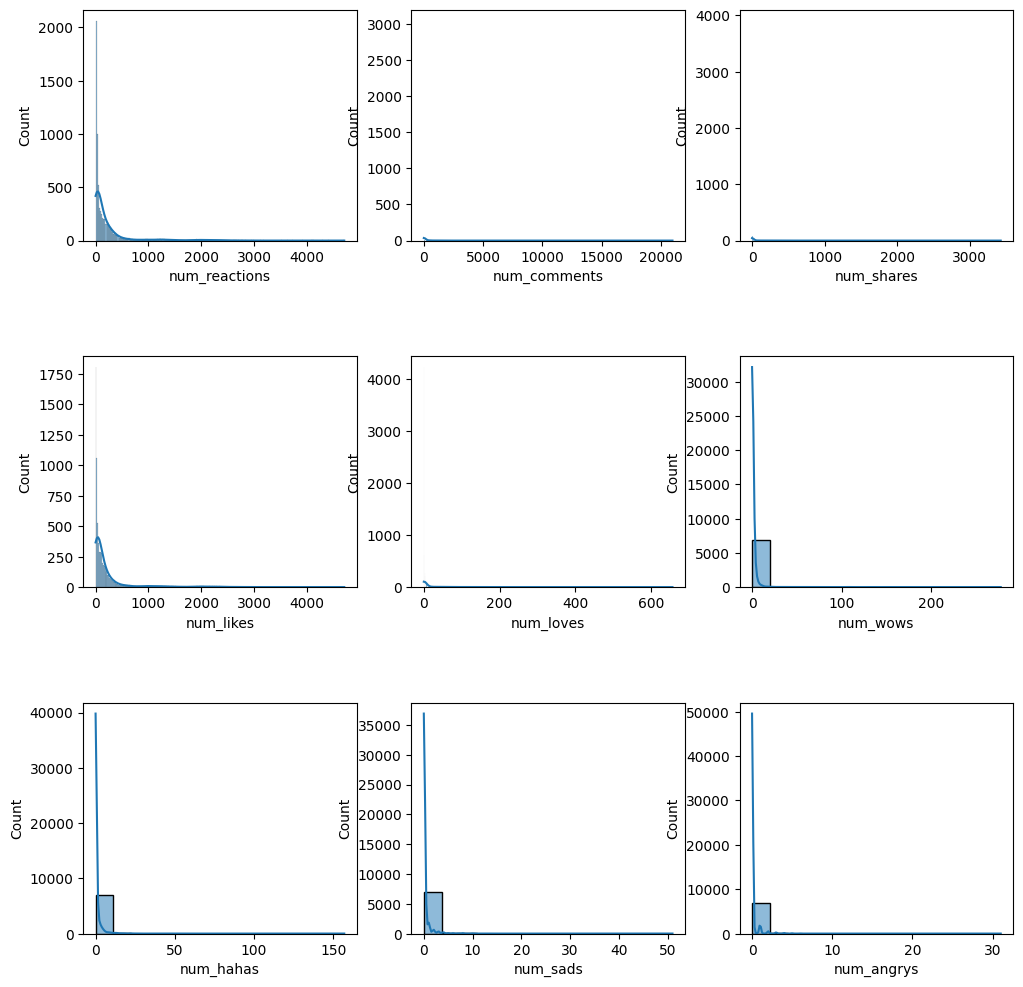

In [21]:
columns = df_tailand_4.columns.drop(["status_type","stat_pub_date","stat_pub_time"])

plt.figure(figsize=(12, 12))

for i, columna in enumerate(columns):
    plt.subplot(3, 3, i + 1)  # Utiliza el índice i para calcular la posición del subplot
    sns.histplot(data=df_tailand_4[columna], kde=True)
    plt.xlabel(columna)
    
plt.subplots_adjust(hspace=0.5)
plt.show()


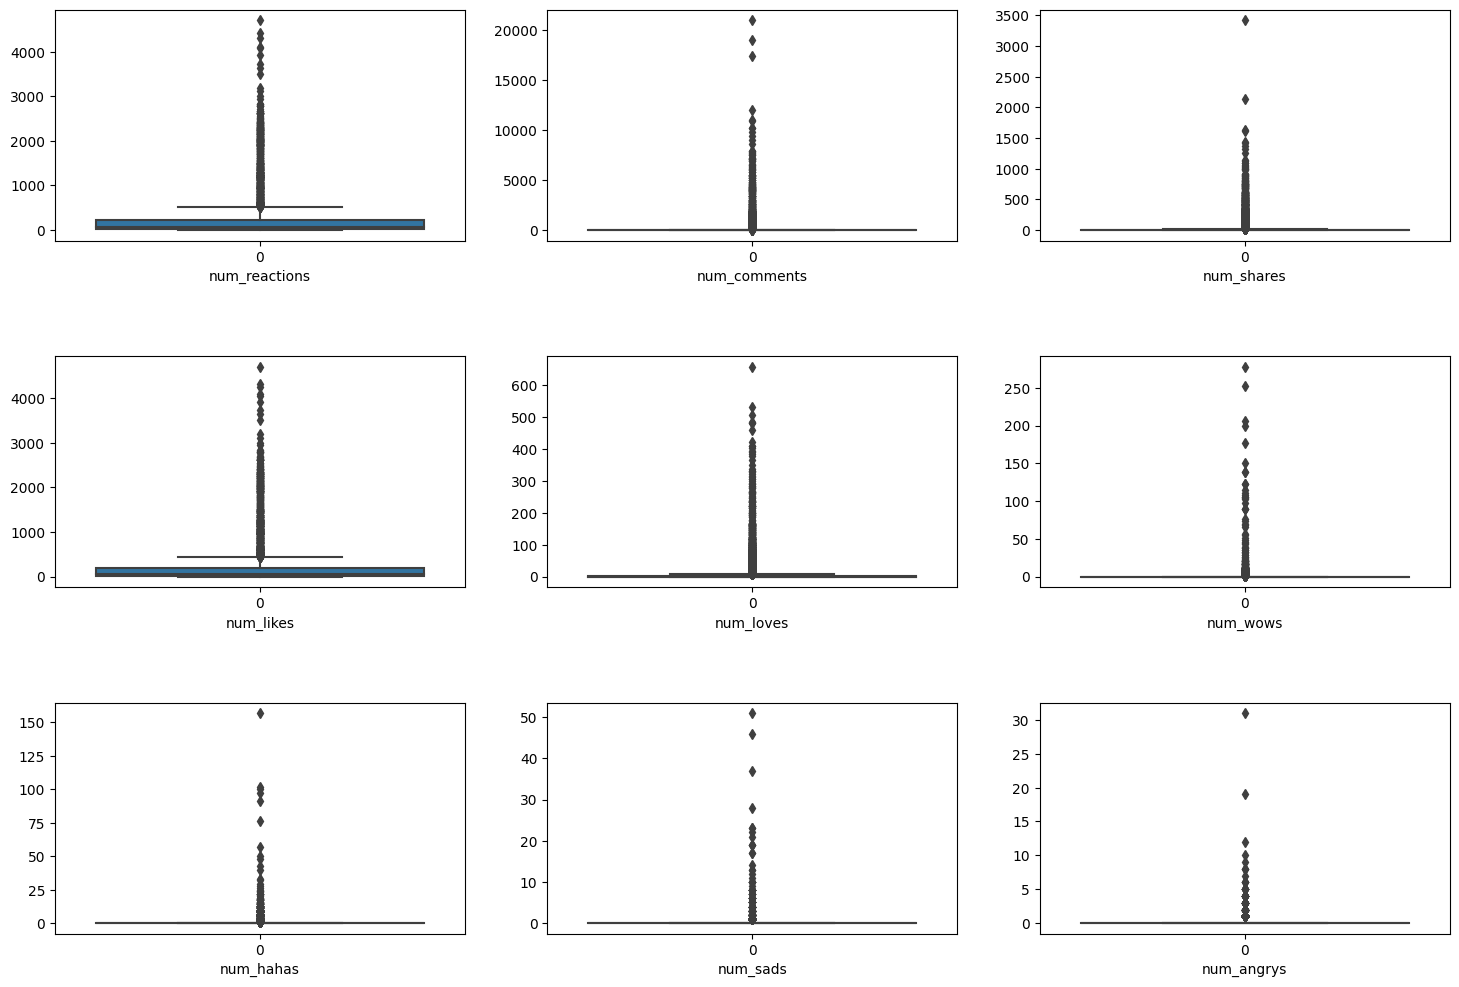

In [22]:
columns = df_tailand_4.columns.drop(["status_type", "stat_pub_date", "stat_pub_time"])

plt.figure(figsize=(18, 12))

for i, columna in enumerate(columns):
    plt.subplot(3, 3, i + 1)  # Utiliza el índice i para calcular la posición del subplot
    sns.boxplot(data=df_tailand_4[columna])
    plt.xlabel(columna)

plt.subplots_adjust(hspace=0.5)
plt.show()


# me falta poder calcular bien el % total

In [58]:
columnas = df_tailand_4[["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]]
result_df = pd.DataFrame(columns=["Columna", "Total", "Porcentaje"])

total_column_values = result_df["Total"].sum()

for column in columnas:
    column_sum = (df_tailand_4[column]).sum()
    column_perc = (column_sum / total_column_values) * 100
    result_df = result_df.append({"Columna": column, "Total": column_sum, "Porcentaje": column_perc}, ignore_index=True)

result_df


,Columna,Total,Porcentaje
0,num_reactions,1574737,inf
1,num_comments,1578639,inf
2,num_shares,281770,inf
3,num_likes,1469417,inf
4,num_loves,89248,inf
5,num_wows,8769,inf
6,num_hahas,4885,inf
7,num_sads,1628,inf
8,num_angrys,771,inf


In [24]:
# Miraremos si alguna variable sigue una distribución normal

from scipy.stats import shapiro
from tabulate import tabulate

# Creamos una lista para almacenar los resultados de la prueba
resultados = []

 
for columna in columns:
    stat, p = shapiro(df_tailand_4[columna])
        
    alpha = 0.05  # Nivel de significancia
    if p > alpha:
        resultado= "Probablemente sigue una distribución normal"
    else:
        resultado= "Probablemente no sigue una distribución normal"
        
    resultados.append([columna, stat, p, resultado])

# Imprimimos los resultados en formato tabular
tabla_resultados = tabulate(resultados, headers=["Columna", "stat", "p", "Resultado"], tablefmt="pretty")
print (tabla_resultados) 


+---------------+---------------------+-----+------------------------------------------------+
|    Columna    |        stat         |  p  |                   Resultado                    |
+---------------+---------------------+-----+------------------------------------------------+
| num_reactions | 0.5080708861351013  | 0.0 | Probablemente no sigue una distribución normal |
| num_comments  | 0.2615669369697571  | 0.0 | Probablemente no sigue una distribución normal |
|  num_shares   | 0.3383631110191345  | 0.0 | Probablemente no sigue una distribución normal |
|   num_likes   | 0.48668020963668823 | 0.0 | Probablemente no sigue una distribución normal |
|   num_loves   | 0.3532673120498657  | 0.0 | Probablemente no sigue una distribución normal |
|   num_wows    | 0.10568791627883911 | 0.0 | Probablemente no sigue una distribución normal |
|   num_hahas   | 0.1478068232536316  | 0.0 | Probablemente no sigue una distribución normal |
|   num_sads    | 0.13559985160827637 | 0.0 | Prob

Hemos comprobado que nuestras variables no seguían una distribución normal y además todas ellas contienen muchos outliers. 

Para poder aplicar un modelo K-Means es importante normalizar o estandarizar las características antes de aplicar el algoritmo debido a la sensibilidad a la escala de este.

Los próximos pasos que vamos a seguir son:

* 1- Hacer un test de robustez a las variables numéricas
* 2- Crear variables dummie para la variable categórica "status_type"
* 3- Hacer un PCA a las variables numéricas
* 4- Crear un nuevo dataframe que contenga las variables dummies de status_type y los valores de PCA. En este dataframe no será necesario añadir variables tales como "status_id" o las variables de fecha y tiempo.

In [25]:
# Hacemos el test de Robustez para las variables numéricas
# columns = df_tailand_4.columns.drop(["status_type", "stat_pub_date", "stat_pub_time"])

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_tailand_4_scaled = df_tailand_4.copy()
df_tailand_4_scaled[columns] = scaler.fit_transform(df_tailand_4_scaled[columns])
df_tailand_4_scaled = df_tailand_4_scaled.round(4)

df_tailand_4_scaled



,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_pub_date,stat_pub_time
0,video,2.3668,23.0909,65.50,2.2727,30.6667,3.0,1.0,1.0,0.0,2018-04-22,06:00:00
1,photo,0.4623,-0.1818,0.00,0.5636,0.0000,0.0,0.0,0.0,0.0,2018-04-21,22:45:00
2,video,0.8492,10.5455,14.25,0.8909,7.0000,1.0,1.0,0.0,0.0,2018-04-21,06:17:00
3,photo,0.2663,-0.1818,0.00,0.3273,0.0000,0.0,0.0,0.0,0.0,2018-04-21,02:29:00
4,photo,0.7789,-0.1818,0.00,0.8909,3.0000,0.0,0.0,0.0,0.0,2018-04-18,03:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,0.1558,-0.1818,0.00,0.1939,0.0000,0.0,0.0,0.0,0.0,2016-09-24,02:58:00
7046,photo,-0.2111,-0.1818,0.00,-0.2606,0.3333,0.0,1.0,0.0,0.0,2016-09-23,11:19:00
7047,photo,-0.2814,-0.1818,0.00,-0.3394,0.3333,0.0,0.0,0.0,0.0,2016-09-21,23:03:00
7048,photo,1.4724,0.3636,5.50,1.7697,0.6667,0.0,0.0,0.0,0.0,2016-09-20,00:43:00


In [26]:
# Creamos variables dummie para la variable categórica "status_type" a través del Dummie Encoding
#photo     4288
#video     2334
#status     365
#link        63

#df_tailand_4_encoded = pd.get_dummies(df_tailand_4_scaled, columns=["status_type"],drop_first=True) #esto elimina la primera col

df_tailand_4_encoded = pd.get_dummies(df_tailand_4_scaled, columns=["status_type"], prefix="", prefix_sep="")
df_tailand_4_encoded




,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_pub_date,stat_pub_time,link,photo,status,video
0,2.3668,23.0909,65.50,2.2727,30.6667,3.0,1.0,1.0,0.0,2018-04-22,06:00:00,0,0,0,1
1,0.4623,-0.1818,0.00,0.5636,0.0000,0.0,0.0,0.0,0.0,2018-04-21,22:45:00,0,1,0,0
2,0.8492,10.5455,14.25,0.8909,7.0000,1.0,1.0,0.0,0.0,2018-04-21,06:17:00,0,0,0,1
3,0.2663,-0.1818,0.00,0.3273,0.0000,0.0,0.0,0.0,0.0,2018-04-21,02:29:00,0,1,0,0
4,0.7789,-0.1818,0.00,0.8909,3.0000,0.0,0.0,0.0,0.0,2018-04-18,03:22:00,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.1558,-0.1818,0.00,0.1939,0.0000,0.0,0.0,0.0,0.0,2016-09-24,02:58:00,0,1,0,0
7046,-0.2111,-0.1818,0.00,-0.2606,0.3333,0.0,1.0,0.0,0.0,2016-09-23,11:19:00,0,1,0,0
7047,-0.2814,-0.1818,0.00,-0.3394,0.3333,0.0,0.0,0.0,0.0,2016-09-21,23:03:00,0,1,0,0
7048,1.4724,0.3636,5.50,1.7697,0.6667,0.0,0.0,0.0,0.0,2016-09-20,00:43:00,0,1,0,0


In [27]:
# Creamos un dataframe sólo con las nuevas variables dummies
df_tailand_4_enc_def = df_tailand_4_encoded[["link","photo","status","video"]]

df_tailand_4_enc_def.reset_index(drop=True, inplace=True) # IMP!!!Estaba usando el índice original y en un futuro hubiera dado problemas

df_tailand_4_enc_def

,link,photo,status,video
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
6994,0,1,0,0
6995,0,1,0,0
6996,0,1,0,0
6997,0,1,0,0


In [28]:
# Vamos a contar el total de los valores y a ver su % sobre el total

# Crearmos un DataFrame vacío para almacenar los resultados
result_df = pd.DataFrame(columns=["Columna", "Total", "Porcentaje"])

for column in df_tailand_4_enc_def.columns:
    column_sum = (df_tailand_4_enc_def[column] == 1).sum()
    column_perc = ((column_sum / df_tailand_4_enc_def.shape[0]) * 100).round(2)
    
    result_df = result_df.append({"Columna": column, "Total": column_sum, "Porcentaje": column_perc}, ignore_index=True)

# Mostrar el DataFrame resultante
result_df


,Columna,Total,Porcentaje
0,link,63,0.90
1,photo,4244,60.64
2,status,359,5.13
3,video,2333,33.33


Para poder obtener una mejor comprensión futura de los datos, hemos decidido mantener 4 columnas para el método dummie. A pesar de que ello pueda generar un pequeño grado de distorsión de los datos. Merece la pena para un futuro estudio de los diferentes valores de la categoría para entender mejor la clusterización. Hemos podido observar que el 60% de nuestros registros son fotos, mientras que el 33% son videos. Apenas se han hecho posts con links.

In [29]:
df_tailand_5=df_tailand_4_encoded[["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]]
df_tailand_5.reset_index(drop=True, inplace=True) # Elimina el índice anterior. Empezando el contador a 0
df_tailand_5

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.3668,23.0909,65.50,2.2727,30.6667,3.0,1.0,1.0,0.0
1,0.4623,-0.1818,0.00,0.5636,0.0000,0.0,0.0,0.0,0.0
2,0.8492,10.5455,14.25,0.8909,7.0000,1.0,1.0,0.0,0.0
3,0.2663,-0.1818,0.00,0.3273,0.0000,0.0,0.0,0.0,0.0
4,0.7789,-0.1818,0.00,0.8909,3.0000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6994,0.1558,-0.1818,0.00,0.1939,0.0000,0.0,0.0,0.0,0.0
6995,-0.2111,-0.1818,0.00,-0.2606,0.3333,0.0,1.0,0.0,0.0
6996,-0.2814,-0.1818,0.00,-0.3394,0.3333,0.0,0.0,0.0,0.0
6997,1.4724,0.3636,5.50,1.7697,0.6667,0.0,0.0,0.0,0.0



El próximo paso que tenemos que hacer antes de crear nuestro algoritmo con K-MEANS es reducir las dimensiones numéricas de nuestro dataset. Para ello, usaremos la técnica de **PCA Principal Component Analysis**. Esta técnica consiste en reducir el número de variables mientras conserva la mayor cantidad posible de información importante. Se logra mediante la transformación de las variables originales en un nuevo conjunto de variables.Permite simplificar y comprender datos complejos al enfocarse en las direcciones principales de la variabilidad en los datos.

También existen otras técnicas para reducir la dimensionalidad en variables numéricas, pero esta es la más usada. 

Si queremos reducir la dimensionalida de variables categóricas existen otras técnicas específicas tales como **LDA, MCA o Capca**.

Para realizar un buen PCA es muy importante definir el número de componentes al que queremos reducirlo. Hay diferentes maneras de determinarlo. La primera que veremos es mediante una gráfica, en la que te indica el % de información que se mantiene con cada n_components.

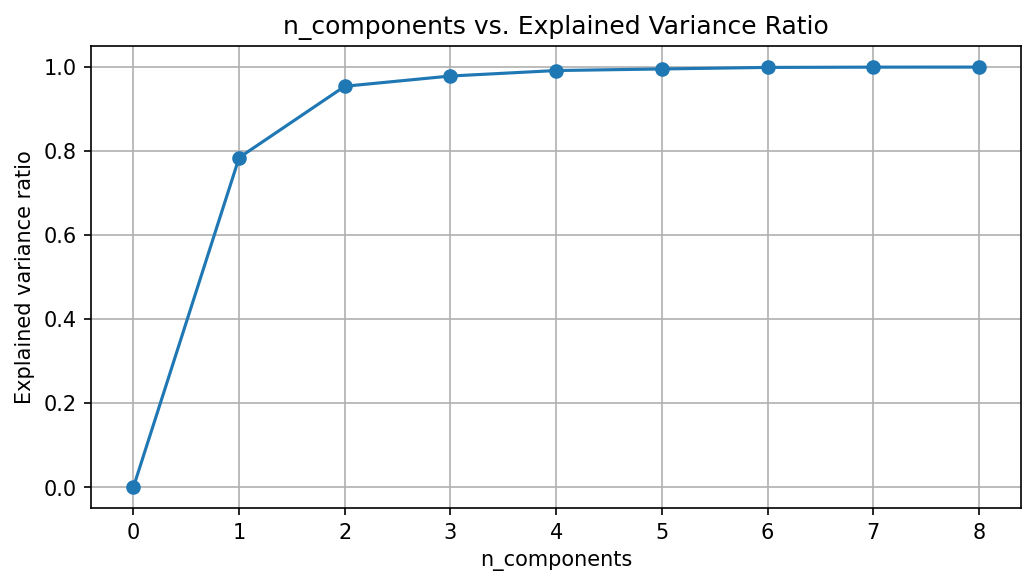

In [30]:
from sklearn.decomposition import PCA  

nums = np.arange(9) #El número ha de coincidir con el total de variables que queremos dimensionar
var_ratio = []

for num in nums:
    pca = PCA(n_components=num)
    pca.fit(df_tailand_5)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 4), dpi=150) 
plt.grid()
plt.plot(nums, var_ratio, marker='o')
plt.xlabel("n_components")
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.show()


Podemos observar que a partir de 2 dimensiones se mantiene más de un 95% de la información. 

A la hora de crear el PCA de nuestras variables se puede pedir de dos maneras o indicando el % ej 0.95 o indicando el número de componentes. En este caso lo haremos de las dos maneras.

In [31]:
# Ahora procederemos con el PCA

from sklearn.decomposition import PCA

pca1 = PCA(n_components=2) # Le estamos indicando el número de dimensiones que queremos y nos devuelve eso en arrays
df_tailand_6 = pca1.fit_transform(df_tailand_5)

print(pca1.components_)


[[ 0.01057486  0.78164688  0.58708355  0.0085086   0.19985613  0.05530811
   0.03299838  0.00818048  0.00442348]
 [ 0.01681044 -0.62122236  0.71593626  0.01410183  0.27886604  0.14983452
   0.02821392 -0.00097856  0.00479189]]


In [32]:
from sklearn.decomposition import PCA

pca2 = PCA(0.95) # Le estamos indicando el % que queremos y el nos da el número de dimensiones o arrays
df_tailand_7 = pca2.fit_transform(df_tailand_5)

print(pca2.components_)

[[ 0.01057486  0.78164688  0.58708355  0.0085086   0.19985613  0.05530811
   0.03299838  0.00818048  0.00442348]
 [ 0.01681044 -0.62122236  0.71593626  0.01410183  0.27886604  0.14983452
   0.02821392 -0.00097856  0.00479189]]


In [33]:
df_tailand_7

array([[ 48.14192456,  39.27990026],
       [-14.87379425,  -2.24116062],
       [  3.37128256,   3.43812279],
       ...,
       [-14.82272998,  -2.17345045],
       [-11.06433657,   1.57758259],
       [-14.88771935,  -2.26376111]])

In [34]:
print(sum(pca1.explained_variance_ratio_))

0.9543624786679291


Podemos afirmar que con el método de pca aplicado con 2 dimensiones, se mantendrán el 95% de la variación de los datos. Lo cual es muy bueno. El siguiente paso en crear un dataframe con las 2 nuevas dimensiones que nos ha dado el PCA. 

In [35]:
df_tailand_7 = pd.DataFrame(df_tailand_7, columns=["Dimens1", "Dimens2"])
df_tailand_7

,Dimens1,Dimens2
0,48.141925,39.279900
1,-14.873794,-2.241161
2,3.371283,3.438123
3,-14.877878,-2.247788
4,-14.268093,-1.394625
...,...,...
6994,-14.880181,-2.251526
6995,-14.788318,-2.142944
6996,-14.822730,-2.173450
6997,-11.064337,1.577583


Una vez tenemos el dataframe "df_tailand_7" con las dimensiones numéricas y el dataframe con las variables categóricas "df_tailand_cat" es el momento de unirlos en un único dataframe.

In [36]:
df_tailand_8 = pd.concat([df_tailand_7, df_tailand_4_enc_def], axis=1)
df_tailand_8

,Dimens1,Dimens2,link,photo,status,video
0,48.141925,39.279900,0,0,0,1
1,-14.873794,-2.241161,0,1,0,0
2,3.371283,3.438123,0,0,0,1
3,-14.877878,-2.247788,0,1,0,0
4,-14.268093,-1.394625,0,1,0,0
...,...,...,...,...,...,...
6994,-14.880181,-2.251526,0,1,0,0
6995,-14.788318,-2.142944,0,1,0,0
6996,-14.822730,-2.173450,0,1,0,0
6997,-11.064337,1.577583,0,1,0,0


Anteriormente, hemos tenido problemas para concatenar los dos Dataframes. Ya que el de las Categorías Dummies usaba los índices del Dataset original. Y ello no permitía una correcta concatenación. Nos daba muchos valores NAN. Por ese motivo hemos dejado algunos scripts comentados. Ya que una vez solucionado, no son necesarios. Pero no está demás mantenerlos.

In [37]:
# Creamos una máscara booleana que indique las filas con valores faltantes
#filas_con_faltantes = df_tailand_8.isna().any(axis=1)

# Filtramos el dataFrame para ver las filas con valores faltantes
#filas_faltantes = df_tailand_8[filas_con_faltantes]

#print(filas_faltantes)


Ya tenemos nuestro dataset listo para aplicarle el modelo de aprendizaje no supervisado **K-MEANS**. Es un método de agrupamiento o clustering que se utiliza en aprendizaje automático y análisis de datos. Su objetivo principal es dividir un conjunto de datos en grupos o clústeres, de manera que los elementos dentro de un mismo clúster sean más similares entre sí que con los elementos de otros clústeres. 
 

Antes de aplicar el modelo haremos el **Elbow Method** método del codo. Este método nos permite determinar el número óptimo de clústeres en técnicas de agrupamiento. El punto en el gráfico donde se produce un cambio de dirección similar a un "codo" se considera una indicación del número óptimo de clústeres.

Para ello necesitamos calcular la **inercia**. La inercia mide cuán cerca están los puntos de datos dentro de un clúster de su respectivo centroide. Cuanto menor sea la inercia, mejor será la agrupación, ya que indica que los puntos están más cerca de sus centroides.

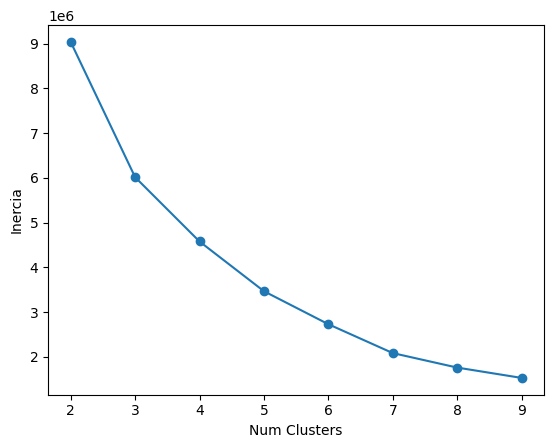

In [38]:
# Calcularemos el número de clusters para este dataset

from sklearn.cluster import KMeans

inercia = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df_tailand_8.values)
    inercia.append(kmeans.inertia_)
    
plt.plot(range(2,10), inercia, marker="o", linestyle="-")
plt.xlabel("Num Clusters")
plt.ylabel("Inercia")
plt.show()


A partir de esta gráfica, podemos afirmar que el número de clusters ideal para este modelo es de 3. De manera que procederemos a hacer una clusterización con K-Means con 3 grupos o clusters.

In [39]:
tail_km = KMeans(n_clusters=3).fit(df_tailand_8.values)
df_tailand_8["cluster"]= tail_km.labels_
df_tailand_8

,Dimens1,Dimens2,link,photo,status,video,cluster
0,48.141925,39.279900,0,0,0,1,1
1,-14.873794,-2.241161,0,1,0,0,0
2,3.371283,3.438123,0,0,0,1,0
3,-14.877878,-2.247788,0,1,0,0,0
4,-14.268093,-1.394625,0,1,0,0,0
...,...,...,...,...,...,...,...
6994,-14.880181,-2.251526,0,1,0,0,0
6995,-14.788318,-2.142944,0,1,0,0,0
6996,-14.822730,-2.173450,0,1,0,0,0
6997,-11.064337,1.577583,0,1,0,0,0


Una vez tenemos la clusterización hecha y añadida a nuestro Dataframe, ahora vamos a representarla gráficamente.

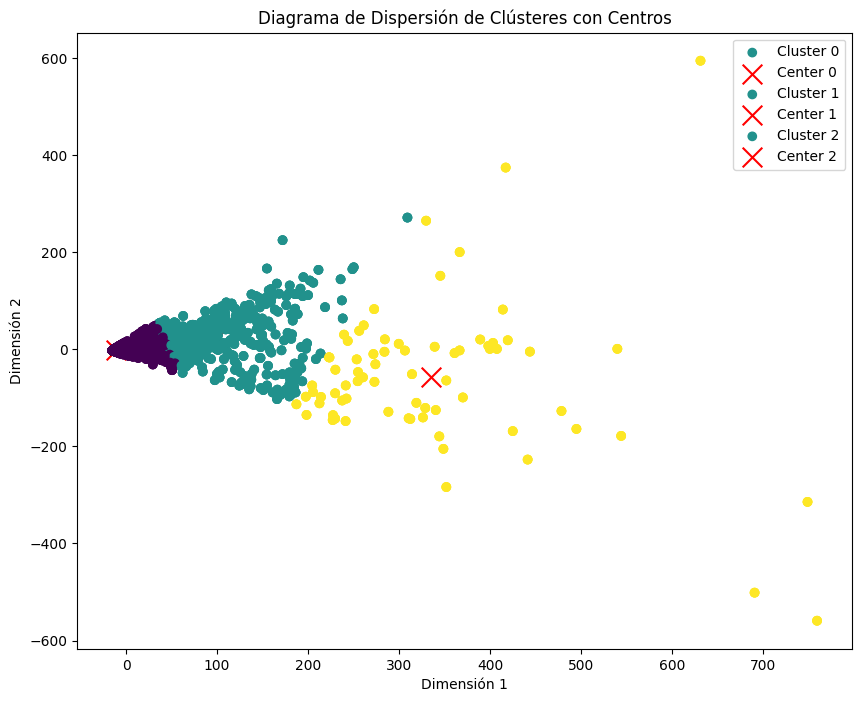

In [40]:
# Asigna un color diferente a cada clúster para una mejor visualización

plt.figure(figsize=(10, 8))

# Itera a través de los clústeres
for cluster in range(tail_km.n_clusters):
    # Dibujamos los puntos de datos en el clúster
    plt.scatter(df_tailand_8['Dimens1'],  
                df_tailand_8['Dimens2'],
                c=df_tailand_8['cluster'],
                marker='o',
                label=f'Cluster {cluster}')
    
     # Dibujamos el centro del clúster
    plt.scatter(tail_km.cluster_centers_[cluster][0], 
                tail_km.cluster_centers_[cluster][1],
                marker='x', color='red', s=200, label=f'Center {cluster}')

plt.xlabel("Dimensión 1")  
plt.ylabel("Dimensión 2")  
plt.title("Diagrama de Dispersión de Clústeres con Centros")
plt.legend()
plt.show()


In [41]:
total_por_cluster = df_tailand_8['cluster'].value_counts().reset_index()# rest_index()convierte la serie en un dataframe
total_por_cluster.columns = ['Cluster', 'Total']
total_por_cluster['Porcentaje'] = ((total_por_cluster['Total'] / len(df_tailand_8))* 100).round(2)
total_por_cluster


,Cluster,Total,Porcentaje
0,0,6452,92.18
1,1,475,6.79
2,2,72,1.03


Una vez hemos hecho la clusterización en 3 grupos podemos observar que el primer cluster (0) es el que tiene más registros tiene (92%). El segundo cluster tiene 475 registros y el 3 72. Esto hace que las diferencias de cluster sean muy grande. A nivel gráfico podemos observar que el cluster 0 está muy concentrado y hay muy poca dispersión entre los datos, mientras que el segundo cluster ya hay más dispersión. Pero el grupo más disperso y que tiene registros muy lejanos es el cluster 2.

In [42]:
# Calculamos la inercia del modelo
inercia = tail_km.inertia_

print("La Inercia del modelo K-Means:", inercia)


La Inercia del modelo K-Means: 6013761.643720639


Esta inercia es elevada debido sobretodo al cluster 2. 

In [66]:
# Agrupamos el DataFrame por la columna "cluster" y suma las categorías dummy
cluster_counts = df_tailand_8.groupby("cluster")[["photo", "status", "video","link"]].sum()


# Muestra el conteo de cada categoría dummy por clúster
cluster_counts

total_clust = pd.concat([total_por_cluster,cluster_counts], axis=1)
total_clust


,Cluster,Total,Porcentaje,photo,status,video,link
0,0,6452,92.18,4241.0,359.0,1789.0,63.0
1,1,475,6.79,2.0,0.0,473.0,0.0
2,2,72,1.03,1.0,0.0,71.0,0.0


Ahora relacionaremos también los clusters co las reacciones a las publicaciones. Para ello lo primero que haremos es vincular los clusters a los valores originales de las reacciones del dataset.

In [44]:
cluster_react = df_tailand_4[["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]]

cluster_react.reset_index(drop=True, inplace=True) # IMP!!!Estaba usando el índice original y en un futuro hubiera dado problemas

cluster_react = pd.concat([df_tailand_8["cluster"],cluster_react], axis=1)
cluster_react

,cluster,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,529,512,262,432,92,3,1,1,0
1,0,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,0,111,0,0,111,0,0,0,0,0
4,0,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6994,0,89,0,0,89,0,0,0,0,0
6995,0,16,0,0,14,1,0,1,0,0
6996,0,2,0,0,1,1,0,0,0,0
6997,0,351,12,22,349,2,0,0,0,0


In [45]:
cluster_react_counts = cluster_react.groupby("cluster")[["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]].sum()
cluster_react_counts

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster,,,,,,,,,
0,1291115,330138,70407,1254973,29223,3775,1881,905,339
1,234604,761752,162569,177173,49990,4231,2364,503,343
2,49018,486749,48794,37271,10035,763,640,220,89


In [46]:
total_cluster = pd.concat([total_por_cluster,cluster_counts, cluster_react_counts], axis=1)
total_cluster

,Cluster,Total,Porcentaje,photo,status,video,link,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,6452,92.18,4241.0,359.0,1789.0,63.0,1291115,330138,70407,1254973,29223,3775,1881,905,339
1,1,475,6.79,2.0,0.0,473.0,0.0,234604,761752,162569,177173,49990,4231,2364,503,343
2,2,72,1.03,1.0,0.0,71.0,0.0,49018,486749,48794,37271,10035,763,640,220,89


In [59]:
total_comm = cluster_react_counts.div([6452, 475, 72], axis=0)  # Dividir cada fila por los valores correspondientes
total_comm

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster,,,,,,,,,
0,200.110818,51.168320,10.912430,194.509144,4.529293,0.585090,0.291538,0.140267,0.052542
1,493.903158,1603.688421,342.250526,372.995789,105.242105,8.907368,4.976842,1.058947,0.722105
2,680.805556,6760.402778,677.694444,517.652778,139.375000,10.597222,8.888889,3.055556,1.236111


A simple vista, parecía que los datos del cluster 0 y 1 eran los más comentados o tenían más interacción por parte de los usuarios. Pero si tenemos en cuenta el número de publicaciones totales de cada grupo y dividimos las interacciones. Nos damos cuenta que el cluster 2, a pesar de ser el más pequeño és el que tiene una mayor interacción por parte de los usuarios.Y el que menos interacción tiene es el 0. También podemos observar que el formato de post que mayor interacción tiene es el video. El 99% del grupo 2 y también el grupo 1 están formados por videos y son los que más reacciones tienen por publicación. 

Al haber visto la dispersión del segundo y tercer cluster, en especial el tercero . Así como observar que la inercia es bastante elevada. He creido conveniente crear un nuevo modelo **K-Means** con **4 clusters**. 

In [67]:
# Vamos a hacer de nuevo el método pero esta vez con 4 clusters para ver cómo sería

kmeans4 = KMeans(n_clusters=4).fit(df_tailand_8.values)
cluster_labels = kmeans4.labels_

df_tailand_9 = df_tailand_8.copy()  # Crea una copia del DataFrame original
df_tailand_9["cluster"] = cluster_labels

df_tailand_9

,Dimens1,Dimens2,link,photo,status,video,cluster
0,48.141925,39.279900,0,0,0,1,1
1,-14.873794,-2.241161,0,1,0,0,0
2,3.371283,3.438123,0,0,0,1,0
3,-14.877878,-2.247788,0,1,0,0,0
4,-14.268093,-1.394625,0,1,0,0,0
...,...,...,...,...,...,...,...
6994,-14.880181,-2.251526,0,1,0,0,0
6995,-14.788318,-2.142944,0,1,0,0,0
6996,-14.822730,-2.173450,0,1,0,0,0
6997,-11.064337,1.577583,0,1,0,0,0


In [69]:
total_por_cluster_4 = df_tailand_9['cluster'].value_counts().reset_index()# rest_index()convierte la serie en un dataframe
total_por_cluster_4.columns = ['Cluster', 'Total']
total_por_cluster_4['Porcentaje'] = ((total_por_cluster_4['Total'] / len(df_tailand_9))* 100).round(2)
total_por_cluster_4

,Cluster,Total,Porcentaje
0,0,6164,88.07
1,1,604,8.63
2,3,197,2.81
3,2,34,0.49


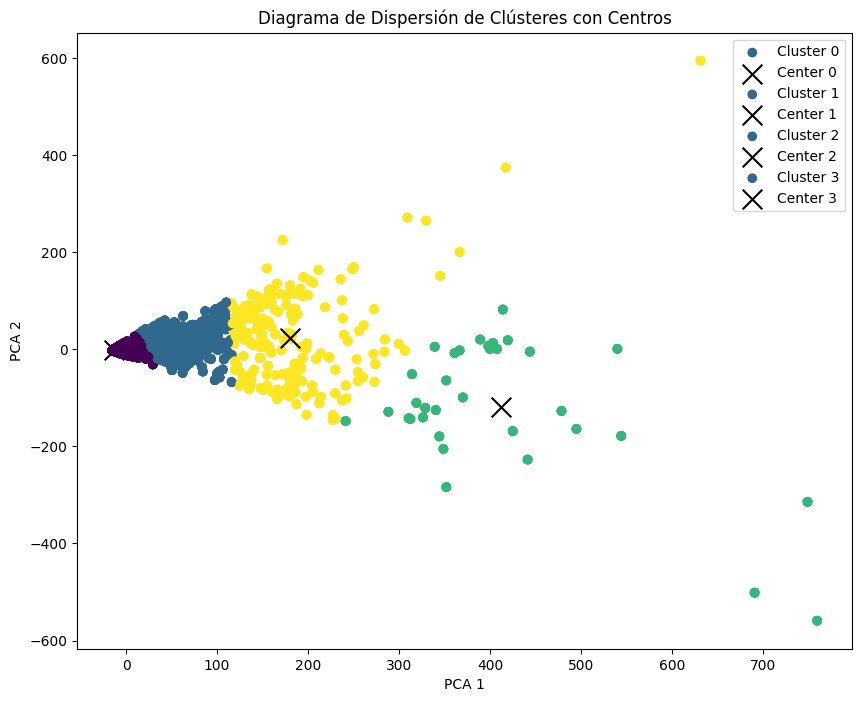

In [68]:
# Asigna un color diferente a cada clúster para una mejor visualización
colores = ['b', 'y', 'r','g']

plt.figure(figsize=(10, 8))

# Itera a través de los clústeres
for cluster in range(kmeans4.n_clusters):
    # Dibujamos los puntos de datos en el clúster
    plt.scatter (df_tailand_9['Dimens1'],  # Reemplaza 0 y 1 con las columnas apropiadas
                df_tailand_9['Dimens2'],
                c=df_tailand_9['cluster'],
                marker='o',
                label=f'Cluster {cluster}')

    # Dibujamos el centro del clúster
    plt.scatter(kmeans4.cluster_centers_[cluster][0], 
                kmeans4.cluster_centers_[cluster][1],
                marker='x', color='black', s=200, label=f'Center {cluster}')

plt.xlabel("PCA 1")  # Equivale a Dimensión
plt.ylabel("PCA 2")  # Equivale a Dimensión
plt.title("Diagrama de Dispersión de Clústeres con Centros")
plt.legend()
plt.show()

In [70]:
# Calculamos la inercia del modelo
inercia = kmeans4.inertia_

print("La Inercia del modelo K-Means:", inercia)


La Inercia del modelo K-Means: 4571847.833456735


La inercia ha disminuido mucho, pero no creo que sea interesante esta clusterización, ya que nos da un grupo de 32 registros sobre un total de 6998. Es demasiado específico. De manera que creo que es positivo mantener la clusterización de 3 grupos como máximo. No le veo sentido hacer más grupos.

### Ejercicio 2

**Clasifica los diferentes registros utilizando el algoritmo de clustering jerárquico o Hierarchical Agglomerative Clustering Algorithm**

El **algoritmo de clustering jerárquico** crea una jerarquía de clústeres al agrupar iterativamente puntos de datos en clústeres más grandes. A medida que avanza el proceso, los clústeres se fusionan gradualmente en clústeres más grandes, lo que resulta en una estructura de árbol.

Antes de aplicar este algoritmo, crearemos un **dendrograma** para visualizar la estructura de agrupamiento de los datos. Un dendrograma es un diagrama de árbol que muestra la jerarquía de los clusters formados en base a la similitud o distancia entre las observaciones.


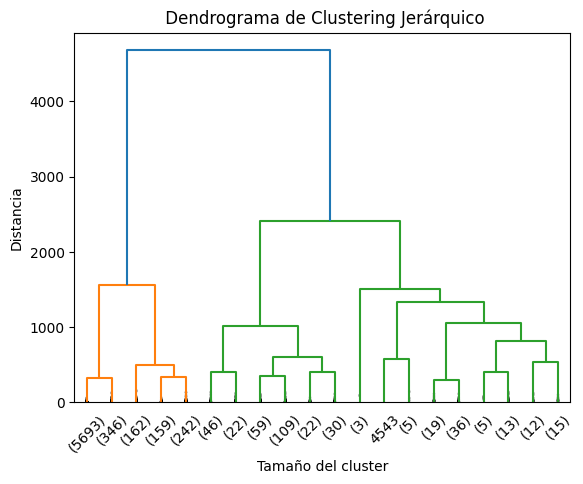

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_tailand_8, 'ward') # Usamos el metodo ward ya que por experiencia sabemos que el tamaño de los clusters son desiguales
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=10., show_contracted=True) # p es el número de particiones con las que se empieza
plt.title(' Dendrograma de Clustering Jerárquico')
plt.xlabel('Tamaño del cluster')
plt.ylabel('Distancia')



plt.show()

Un dendrograma permite visualizar cómo se agrupan los elementos en función de su similitud. La altura en la que dos grupos se fusionan en el dendrograma representa la medida de similitud o distancia entre esos grupos. Cuanto más abajo en el dendrograma ocurra la fusión, mayor será la similitud entre los elementos o grupos fusionados. Distancia horizontal: Las distancias horizontales entre las fusiones de clusters indican la distancia o disimilitud entre ellos. Cuanto mayor sea la distancia horizontal, mayor es la disimilitud entre los clusters fusionados. 

En este dendrograma podemos ver que la distancia entre horizontal suele ser pequeña, lo que nos indica que en general hay bastante similitud entre los datos agrupados. Pero a medida que se van fusionando los clusters esa distancia va creciendo. Lo mismo pasa con la distancia vertical. 

Analizando detenidamente la gráfica, sería conveniente hacer una clusterización de 3 grupos.

In [75]:
# Haremos la clusterización con 3 grupos. K=3

from sklearn.cluster import AgglomerativeClustering

clust_jer_tail = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clust_jer_tail.fit(df_tailand_8)

clust_jer_tail_ward =clust_jer_tail.labels_
clust_jer_tail_ward

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
df_tailand_8['cluster_hward'] = clust_jer_tail_ward
df_tailand_8['cluster_hward'].value_counts()

0    6602
2     288
1     109
Name: cluster_hward, dtype: int64

### Ejercicio 3

**Calcula el rendimento del clustering mediante un parámetreo como puede ser silhouette.**

El **parámetro de silhouette** se usa para evaluar el modelo de clusterización. Tiene en cuenta dos medidas. La cohesión que es la separación de los valores dentro del cluster entre ellos y la separación que calcula la separación de un cluster con los puntos del cluster más cercano.




In [ ]:
from sklearn.metrics import silhouette_score

silhouette_km = silhouette_score(df_tailand_8,tail_km.labels_)
print("El valor de silhouette es ",silhouette_km)




Los **valores de silhouette** van del  -1 al 1, siendo 1 el valor que indica que la clusterización es buena, el valor de 0 inidica que los clusters estarían superpuestos  y siendo de -1 o cercano indicaría que la asignación de clusters es erronea.

En este caso, la puntuación que nos ha dado ha sido de 0.814, lo que es un valor cercano a 1. Podemos confirmar que la clusterización ha sido buena.

También existen otras técnicas como el **método Davies-Bouldin** para valorar la clusterización. Esta es parecida a la silhouete pero tiene en cuenta los centroides de los clusters.

In [ ]:
from sklearn.metrics import davies_bouldin_score

d_km = davies_bouldin_score(df_tailand_8,tail_km.labels_)
print("El valor de Davies_Bouldin es ", d_km)

Los valores de Davies-Bouldin van de 0 al infinito positivo. Cuanto más cercano a 0 sea, mejor clusterizado estará el modelo. 

En nuestro caso, tenemos una puntuación de 0.541 lo que nos confirma que la clusterización está bien hecha.

Estos modelos también se pueden usar para predecir el número de clusters "k" que sería optimo. 

In [ ]:
resultados = []

for k in range (2,10):
    clusters = KMeans(n_clusters=k)
    clusters.fit_predict(df_tailand_8)
    tail_silh = silhouette_score(df_tailand_8, clusters.labels_)
    tail_dav_bou = davies_bouldin_score(df_tailand_8, clusters.labels_)
    resultados.append([k, tail_silh, tail_dav_bou])
    
for resultado in resultados:
    print(resultado)

In [ ]:
df_resultados = pd.DataFrame(resultados, columns=["k", "Silhouette", "Dav_Boudin"])
df_resultados

Según las puntuaciones de de Silhouette y Davies-Boudin la mejor clusterización sería con 2 clusters. Pero si tenemos en cuenta los valores que nos ha dado antes el cálculo de la inercia que también mide la calidad del agrupamiento el valor para dos clusters era bastante elevada. De manera que teniendo en cuenta los tres métodos el número de clusters ideal para este modelo es de 3.

Esta clusterización se podría haber hecho de diferentes maneras. Otras variables que se podrían haber usado son el momento del día en el que se han hecho estas publicaciones o el mes del año en el que se han publicado. Esto hubiera dado pie a una clusterización parecida, pero con más detalle.


Como conclusión final podemos decir que la clusterización podría ser el la manera de encontrar un target (variable y). Esto significaría que se podría continuar nuestro análisis a con una clasificación de aprendizaje supervisado usando esta clasificación como variable target.

